In [540]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,PowerTransformer

import joblib
import warnings
warnings.filterwarnings('ignore')

In [361]:
#To display All the data in the dataset
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [362]:
#importing data set
df=pd.read_csv("Telecom_customer_churn.csv")

In [363]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [364]:
#shape of the dataset
df.shape

(7043, 21)

we have 7043 rows and 21 columns in the dataset

In [365]:
#duplicates removal
df.drop_duplicates(inplace=True)
df.shape

(7043, 21)

We have no duplicates in the given dataset

In [366]:
#Checking the data types of all columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

but upon checking we can see that the TotalCharges is containing only float values ,we need to convert this into float data.But we need to check for whitespaces as well based on the datatype as object

In [367]:
df[df.TotalCharges==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


we can observe white spaces in the dataset,lets remove those white columns from the dataset

In [368]:
#Converting TotalCharges from object to float type data
df.TotalCharges=df.TotalCharges.str.strip()
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [369]:
#Checking the data types of all columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

the data type has been updated

In [370]:
#Checking the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [371]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

we are able to observe null values in the dataset on Total charges columns

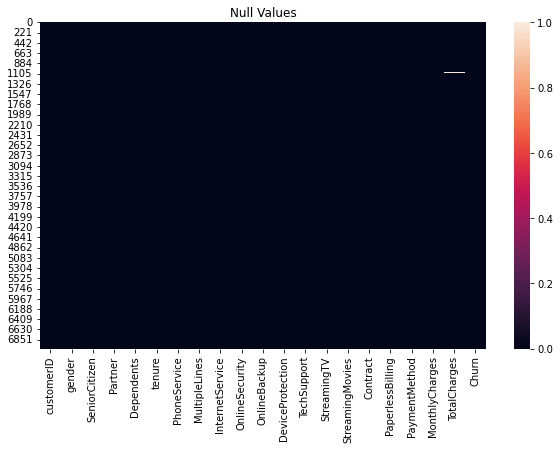

In [372]:
#Visualising null values
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

# Filling null values

In [373]:
#Replacing nan values of TotalCharges column with it's mean
df.TotalCharges=df.TotalCharges.fillna(df["TotalCharges"].mean())

In [374]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [375]:
#Checking description of data set
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [376]:
#Checking description of data set
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [377]:
df.gender.nunique()

2

we can observe 2 unique variables in the gender column in the dataset

In [378]:
df.Partner.nunique()

2

we can observe 2 unique variables in the Partner column in the dataset

In [379]:
df.PhoneService.nunique()

2

In [ ]:
#we can observe 2 unique variables in the PhoneService column in the dataset

In [380]:
df.MultipleLines.nunique()

3

In [ ]:
#we can observe 3 unique variables in the MultipleLines column in the dataset

In [381]:
df.InternetService.nunique()

3

In [ ]:
#we can observe 3 unique variables in the InternetService column in the dataset

In [382]:
df.OnlineSecurity.nunique()

3

In [ ]:
#we can observe 3 unique variables in the OnlineSecurity column in the dataset

In [383]:
df.OnlineBackup.nunique()

3

In [ ]:
#we can observe 3 unique variables in the OnlineBackup column in the dataset

In [384]:
df.DeviceProtection.nunique()

3

In [ ]:
#we can observe 3 unique variables in the DeviceProtection column in the dataset

In [385]:
df.TechSupport.nunique()

3

In [ ]:
#we can observe 3 unique variables in the TechSupport column in the dataset

In [386]:
df.StreamingTV.nunique()

3

In [ ]:
#we can observe 3 unique variables in the StreamingTV column in the dataset

In [388]:
df.StreamingMovies.nunique()

3

In [ ]:
#we can observe 3 unique variables in the StreamingMovies column in the dataset

In [389]:
df.Contract.nunique()

3

In [ ]:
#we can observe 3 unique variables in the Contract column in the dataset

In [390]:
df.PaperlessBilling.nunique()

2

In [ ]:
#we can observe 2 unique variables in the PaperlessBilling column in the dataset

In [391]:
df.PaymentMethod.nunique()

4

In [ ]:
#we can observe 4 unique variables in the PaymentMethod column in the dataset

In [393]:
df.TotalCharges.nunique()

6531

In [ ]:
#There are large data available in the TotalCharges column

In [394]:
df.Churn.nunique()

2

In [ ]:
#we can observe 2 unique variables in the Churn column in the dataset

we can drop the column since all the values are unique and no relation will be there in the model

In [395]:
df.drop('customerID',axis=1,inplace=True)

In [396]:
#assigning numerical features in to list
numer=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Univariate Analysis

In [397]:
df.head(50)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Distribution plot for all numerical columns

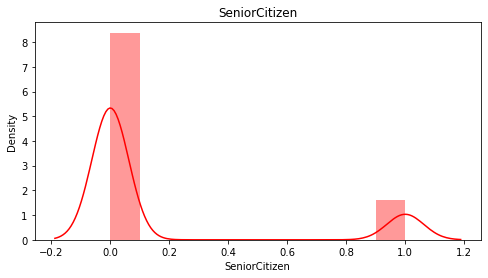

In [398]:
plt.figure(figsize = (8, 4))
sns.distplot(df['SeniorCitizen'], bins = 10, color="r")
plt.title('SeniorCitizen')
plt.show()

In [ ]:
#The data looks  skewed. it is a categorical data

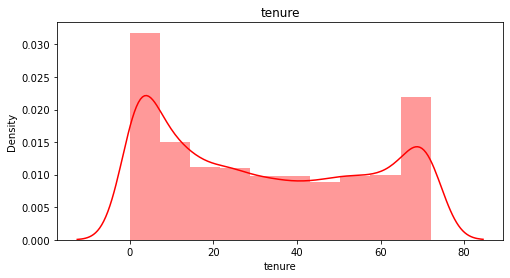

In [399]:
plt.figure(figsize = (8, 4))
sns.distplot(df['tenure'], bins = 10, color="r")
plt.title('tenure')
plt.show()

In [ ]:
#The data looks  skewed.The building block is out of the normalised curve.

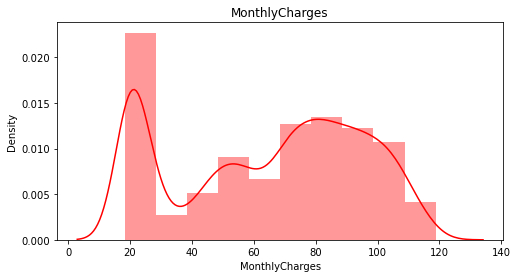

In [400]:
plt.figure(figsize = (8, 4))
sns.distplot(df['MonthlyCharges'], bins = 10, color="r")
plt.title('MonthlyCharges')
plt.show()

In [ ]:
#The data looks  skewed.The building block is out of the normalised curve.

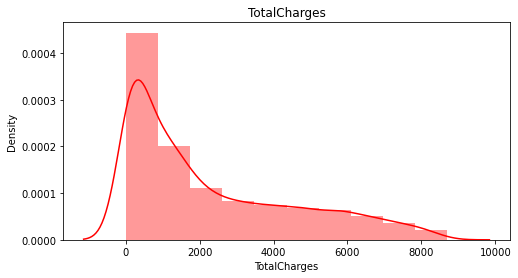

In [401]:
plt.figure(figsize = (8, 4))
sns.distplot(df['TotalCharges'], bins = 10, color="r")
plt.title('TotalCharges')
plt.show()

In [ ]:
#The data looks Right skewed.The building block is out of the normalised curve.

In [402]:
#Checking the value counts of gender column
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

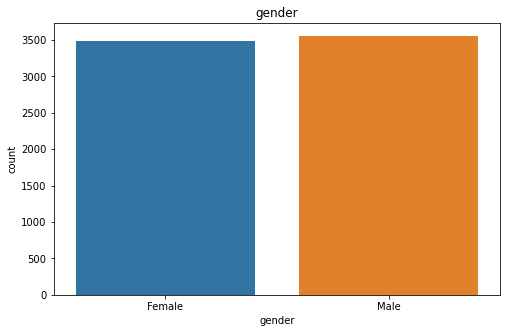

In [403]:
#Count plot for gender
plt.figure(figsize=(8,5))
plt.title('gender')
sns.countplot(df['gender']);

we can observe almost equal count in both Female and male with more data in male compared to Female.The male is of 3555 and
Female is 3488 columns in the dataset

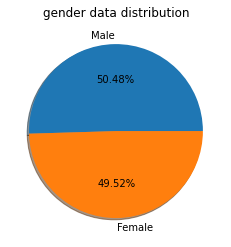

In [405]:
#Ploting pie chart for gender column
labels='Male','Female'
plt.title('gender data distribution')
plt.pie(df['gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can see male is of 50.48% in the dataset and female is of 49.52%

In [404]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [406]:
#Checking the value counts of Partner column
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

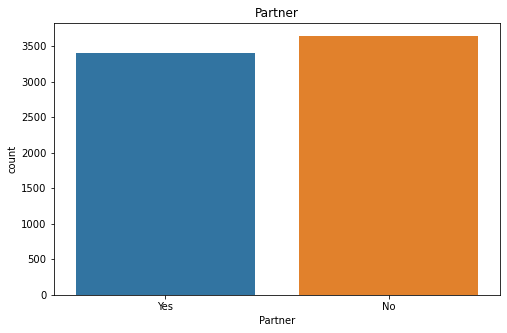

In [407]:
#Count plot for Partner
plt.figure(figsize=(8,5))
plt.title('Partner')
sns.countplot(df['Partner']);

we can observe almost equal count in both Yes and No in Partner column with more data in No compared to Yes.The No is of 3641 and data count for Having partner is 3402  in the dataset

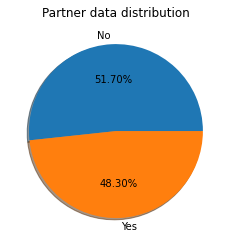

In [408]:
#Ploting pie chart for Partner column
labels='No','Yes'
plt.title('Partner data distribution')
plt.pie(df['Partner'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can see No dependents is of 51.7% in the dataset and data with dependents is of 48.30%

In [409]:
#Checking the value counts of Dependents column
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

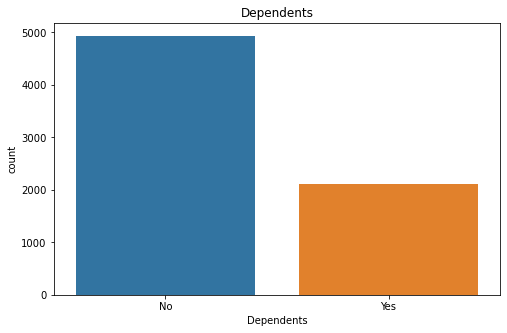

In [410]:
#Count plot for Dependents
plt.figure(figsize=(8,5))
plt.title('Dependents')
sns.countplot(df['Dependents']);

we can observe almost equal count in both Yes and No in Partner column with more data in No compared to Yes.The No is of 3641 and Female is 3402 columns in the dataset

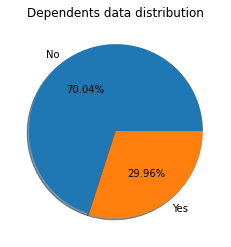

In [411]:
#Ploting pie chart for Dependents column
labels='No','Yes'
plt.title('Dependents data distribution')
plt.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can see data for people with out dependents is of 51.7% in the dataset and data with dependents is of 48.30%

In [412]:
#Checking the value counts of PhoneService column
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

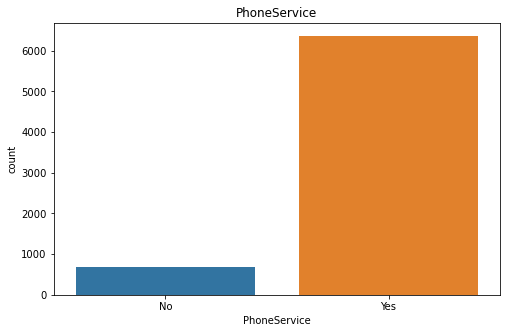

In [413]:
#Count plot for PhoneService
plt.figure(figsize=(8,5))
plt.title('PhoneService')
sns.countplot(df['PhoneService']);

We can observe large difference in the dataset for data with having phone service compared to No.6361 has phone service compared to 682 data without Phoneservice


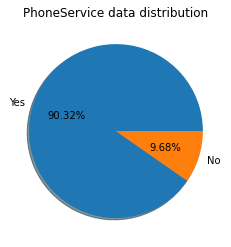

In [414]:
#Ploting pie chart for PhoneService column
labels='Yes','No'
plt.title('PhoneService data distribution')
plt.pie(df['PhoneService'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [ ]:
#We can see data for people with phoneService is of 90.32% in the dataset and data with out phoneservice  is of 9.68 %

In [415]:
#Checking the value counts of MultipleLines column
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

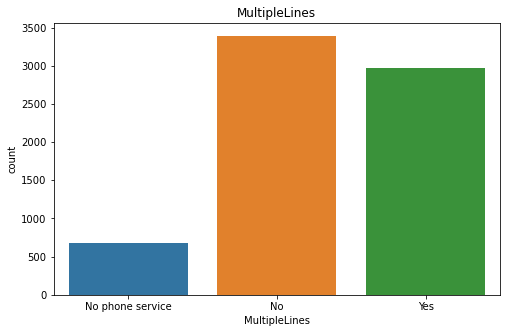

In [416]:
#Count plot for MultipleLines
plt.figure(figsize=(8,5))
plt.title('MultipleLines')
sns.countplot(df['MultipleLines']);

In [ ]:
We can see 3 variables with major data is for No multiple lines and  with a count of 3390 and data for having multiple lines is 2971 in the coumn and No phoenservie is 683 in the datset

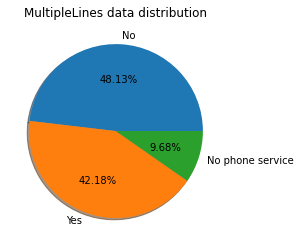

In [417]:
#Ploting pie chart for MultipleLines column
labels='No','Yes','No phone service'
plt.title('MultipleLines data distribution')
plt.pie(df['MultipleLines'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

48.13% of the data is for Without multipleline and 42.18% for having multiplelines and 9.68 for without phoenservice

In [418]:
#Checking the value counts of InternetService column
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

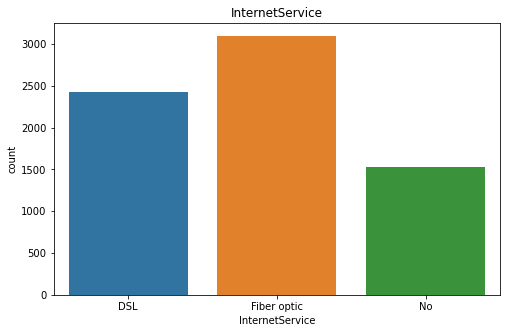

In [419]:

#Count plot for InternetService
plt.figure(figsize=(8,5))
plt.title('InternetService')
sns.countplot(df['InternetService']);


We can observe most of the dataset is for Fibre optic with 2096 in the column and Dsl is having  a count of 2421 and least in
1526 in the dataset

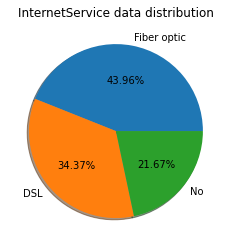

In [420]:
#Ploting pie chart for InternetService column
labels='Fiber optic','DSL','No'
plt.title('InternetService data distribution')
plt.pie(df['InternetService'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

43.96% is having fibreoptic in the dataset and Dsl is having 34.37 in the column and With out internet service is having 21.67% in the dataset

In [421]:
#Checking the value counts of OnlineSecurity column
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

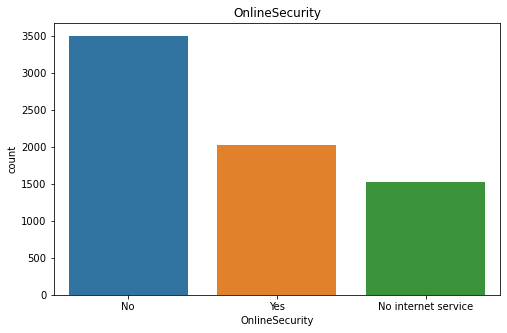

In [422]:
#Count plot for OnlineSecurity
plt.figure(figsize=(8,5))
plt.title('OnlineSecurity')
sns.countplot(df['OnlineSecurity']);


in the dataset we can see the higher count is for without onlinesecurity with 3498 and data with online security is 2019 and least is for Without internet servie in the dataset

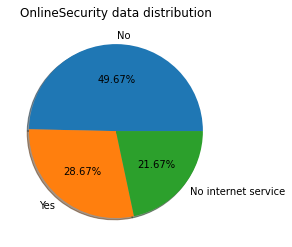

In [423]:
#Ploting pie chart for OnlineSecurity column
labels='No','Yes','No internet service'
plt.title('OnlineSecurity data distribution')
plt.pie(df['OnlineSecurity'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

in the dataset we have 49.67% having no onlinesecurity and 28.67% having onlinje security and rest is having no internet service at all in the dataset

In [425]:
#Checking the value counts of OnlineBackup column
df.OnlineBackup.value_counts()


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

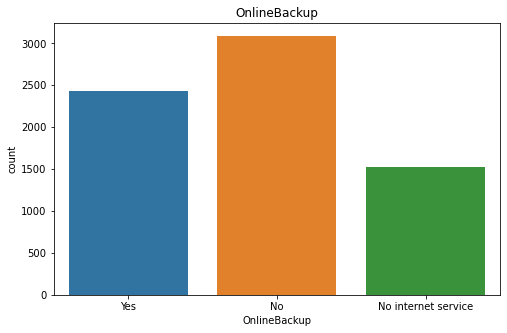

In [426]:
#Count plot for OnlineBackup
plt.figure(figsize=(8,5))
plt.title('OnlineBackup')
sns.countplot(df['OnlineBackup']);


We can see majority of the data is having No backup atall with 3088 count and 2429 is having Online backup and Rest of the variables  have no internet service at all in the dataset

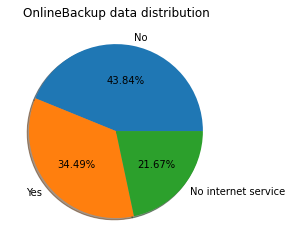

In [427]:
#Ploting pie chart for OnlineBackup column
labels='No','Yes','No internet service'
plt.title('OnlineBackup data distribution')
plt.pie(df['OnlineBackup'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can observe 43.84% having No online backup and 34.48%having online back up rest have no internet at all as per the dataset

In [428]:
#Checking the value counts of DeviceProtection column
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

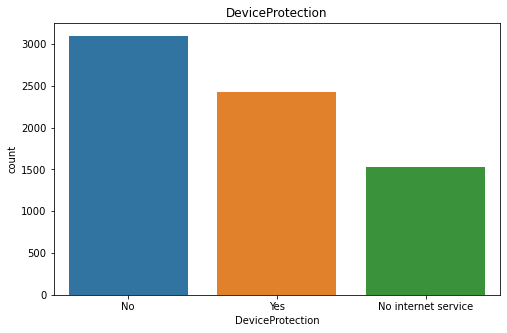

In [429]:
#Count plot for DeviceProtection
plt.figure(figsize=(8,5))
plt.title('DeviceProtection')
sns.countplot(df['DeviceProtection']);


The majority of the data is having No device protection and only 2422 of the data is having Device protection and rest have no internet at all.

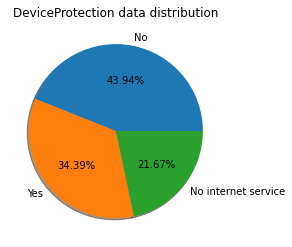

In [430]:
#Ploting pie chart for DeviceProtection column
labels='No','Yes','No internet service'
plt.title('DeviceProtection data distribution')
plt.pie(df['DeviceProtection'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

we can see 43.94% of the dataset are not having device protection and 34.39% is having Device protection and 21.67% of the column is having no internet as well 

In [431]:
#Checking the value counts of TechSupport column
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

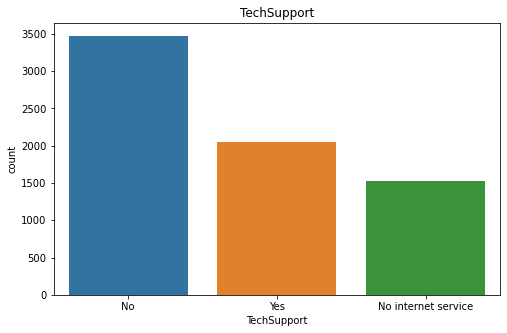

In [432]:
#Count plot for TechSupport
plt.figure(figsize=(8,5))
plt.title('TechSupport')
sns.countplot(df['TechSupport']);

we cans ee 3473 of the dataset is having No techsupport while 2044 people are having Techsupport while rest are not having any internet access at all

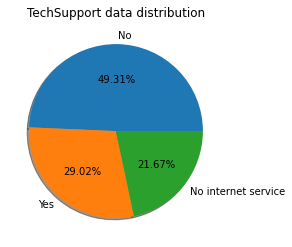

In [433]:
#Ploting pie chart for TechSupport column
labels='No','Yes','No internet service'
plt.title('TechSupport data distribution')
plt.pie(df['TechSupport'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

almost 50& of the dataset is having No techsupport and 39% of the data is of having tech support in the dataset

In [434]:

#Checking the value counts of StreamingTV column
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

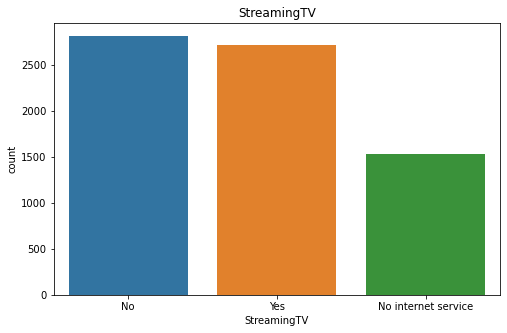

In [435]:
#Count plot for StreamingTV
plt.figure(figsize=(8,5))
plt.title('StreamingTV')
sns.countplot(df['StreamingTV']);

we can see majority of the data is for having in the variable of No StreamingTV with 2810 in the column and 2707 is having StreamingTV availaed in the dataset with 1526 have no internet service at all in the dataset

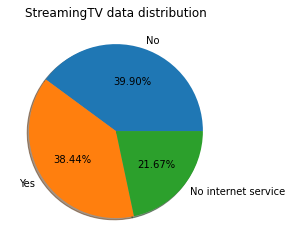

In [436]:
#Ploting pie chart for StreamingTV column
labels='No','Yes','No internet service'
plt.title('StreamingTV data distribution')
plt.pie(df['StreamingTV'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

almost 39.90% of the dataset is having No StreamingTV and 38% of the data is of having tech support in the dataset/Rest have no internet service at all in the dataset

In [437]:
#Checking the value counts of StreamingMovies column
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

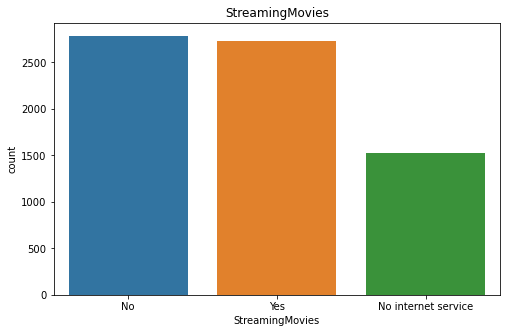

In [438]:
#Count plot for StreamingMovies
plt.figure(figsize=(8,5))
plt.title('StreamingMovies')
sns.countplot(df['StreamingMovies']);

In [ ]:
Almost equal number of count in both having Streaming movies and those with out it.We can see higher counter for without streaming movies of 2785 and 2732 for having straming movies(yes) in the dataset.We can observe a large number having No internet service at all

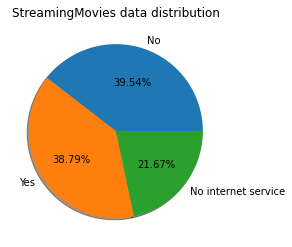

In [439]:
#Ploting pie chart for StreamingMovies column
labels='No','Yes','No internet service'
plt.title('StreamingMovies data distribution')
plt.pie(df['StreamingMovies'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

almost 39.54% of the dataset is having No StreamingMovies and 38.79% of the data is of having StreamingMovies in the dataset/Rest have no internet service at all in the dataset

In [440]:
#Checking the value counts of Contract column
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

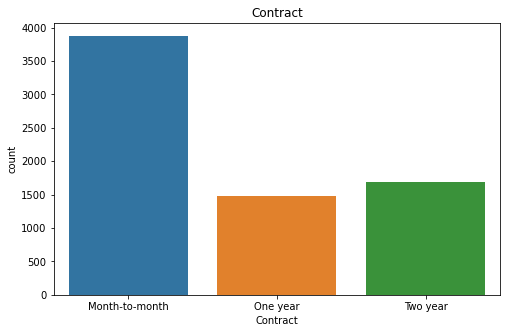

In [441]:
#Count plot for Contract
plt.figure(figsize=(8,5))
plt.title('Contract')
sns.countplot(df['Contract']);

Along teh contracts we can see a high count for Minth to month with 3875 and  1695 for one year contract an dTwo year contracts are having a count of 1473  in the dataset

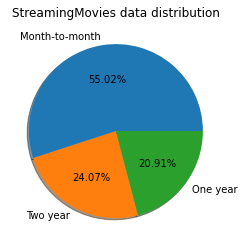

In [442]:
#Ploting pie chart for Contract column
labels='Month-to-month','Two year','One year'
plt.title('StreamingMovies data distribution')
plt.pie(df['Contract'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can observe 55% data for Month to month in the dataset and 24% for Two year and 20.9% for One year contracts in the datset

In [443]:
#Checking the value counts of PaperlessBilling column
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

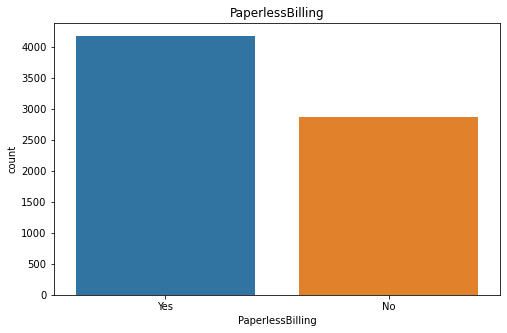

In [444]:
#Count plot for PaperlessBilling
plt.figure(figsize=(8,5))
plt.title('PaperlessBilling')
sns.countplot(df['PaperlessBilling']);

In [ ]:
#In the PaperlessBilling we can see a high count 4171 for having PaperlessBilling while 2872 for having paperbills in the datset 

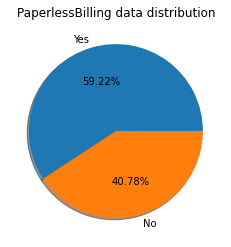

In [445]:
#Ploting pie chart for PaperlessBilling column
labels='Yes','No'
plt.title('PaperlessBilling data distribution')
plt.pie(df['PaperlessBilling'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [ ]:
#We can observe 59% for having paperless billlings while 40% having Paerbills in teh dataset

In [446]:
#Checking the value counts of PaymentMethod column
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

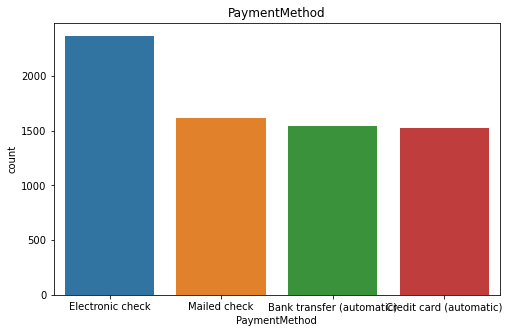

In [447]:
#Count plot for PaymentMethod
plt.figure(figsize=(8,5))
plt.title('PaymentMethod')
sns.countplot(df['PaymentMethod']);

In [ ]:
#in the dataset we can see MAjor data is for Electronic checks with a count of 2365 and resta re having a count lesser tha 1600 in the dataset

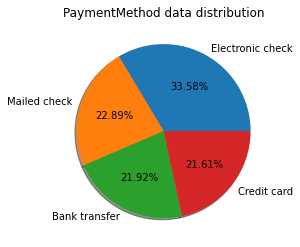

In [448]:
#Ploting pie chart for PaymentMethod column
labels='Electronic check','Mailed check','Bank transfer','Credit card'
plt.title('PaymentMethod data distribution')
plt.pie(df['PaymentMethod'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [449]:
#Checking the value counts of Churn column
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

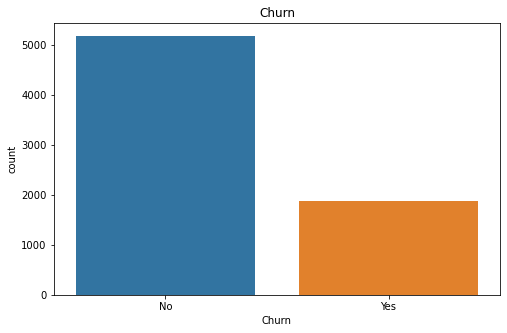

In [450]:
#Count plot for Churn
plt.figure(figsize=(8,5))
plt.title('Churn')
sns.countplot(df['Churn']);

In [ ]:
We can see High count of 5174 for having churn No and 1865 for Churn yes in the dataset

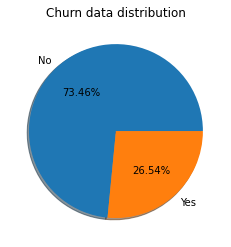

In [451]:
#Ploting pie chart for PaymentMethod column
labels='No','Yes'
plt.title('Churn data distribution')
plt.pie(df['Churn'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the customers are without churn.And there is a data imbalancing issue in target column so we have to balance it.

# Bivariate Analysis

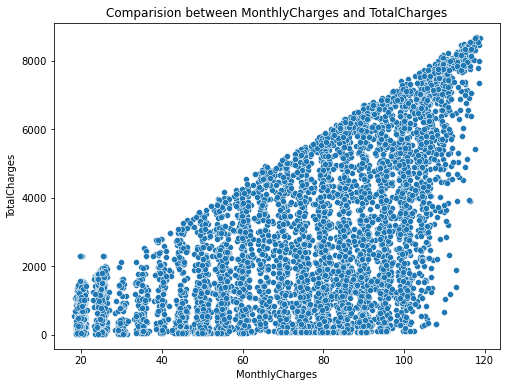

In [452]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between MonthlyCharges and TotalCharges')
sns.scatterplot(x = "MonthlyCharges", y = "TotalCharges", data = df)
plt.show()

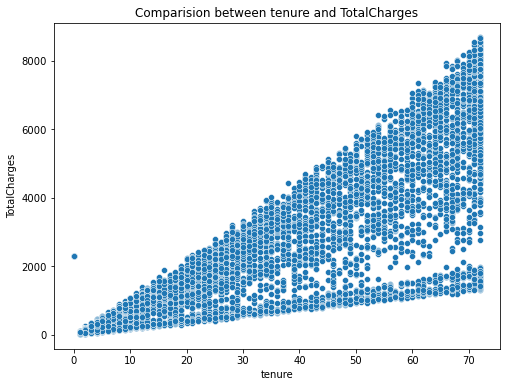

In [453]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between tenure and TotalCharges')
sns.scatterplot(x = "tenure", y = "TotalCharges", data = df)
plt.show()

We can see a linear relation between tenure and TotalCharges and large dataset is present in the tenure more than 50 and strong relationship can be seen here

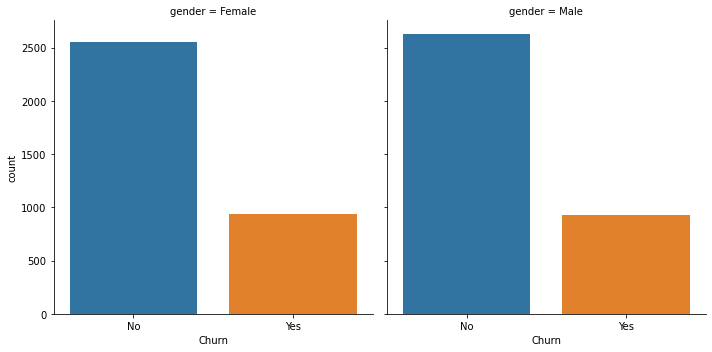

In [454]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='gender',data=df,kind='count')

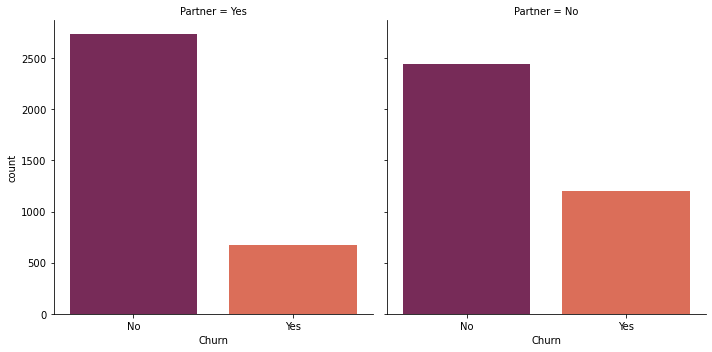

In [455]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='Partner',kind='count',data=df,palette="rocket")

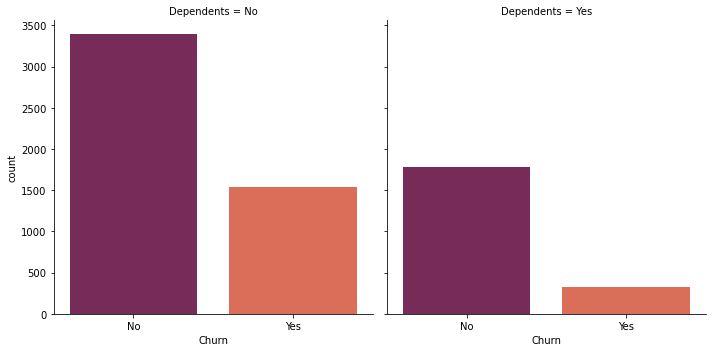

In [456]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='Dependents',data=df,kind='count',palette="rocket")

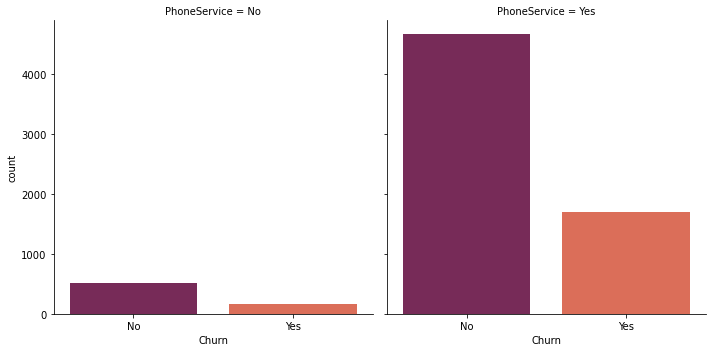

In [457]:

#Comparision between features using cat plot
sns.catplot(x='Churn',col='PhoneService',data=df,kind='count',palette="rocket")

We can majority of the data having Phone service with churn Yes and No high compared to without phoneservices and ver low numbers in the datset

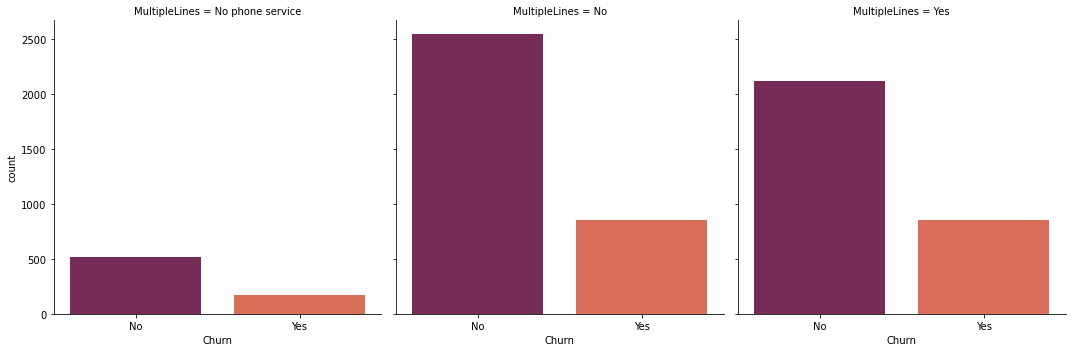

In [458]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='MultipleLines',data=df,kind='count',palette="rocket")

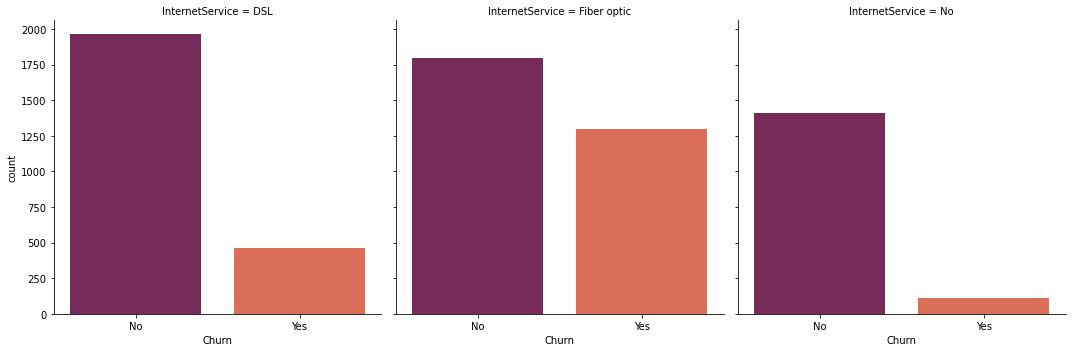

In [459]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='InternetService',data=df,kind='count',palette="rocket")

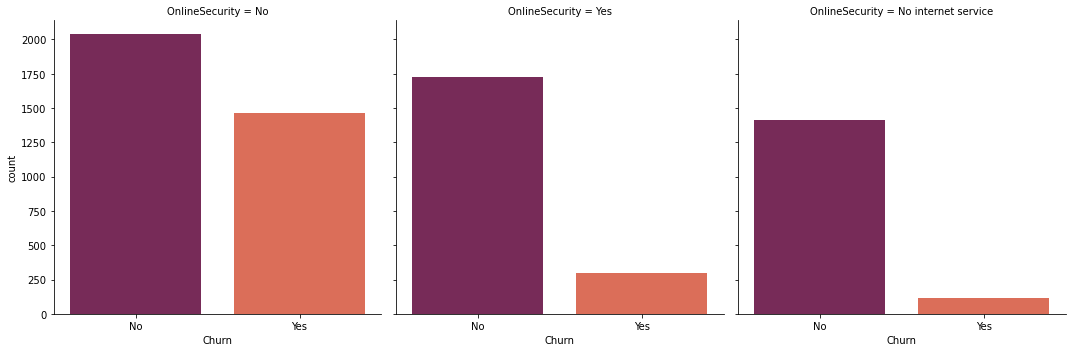

In [460]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='OnlineSecurity',data=df,kind='count',palette="rocket")

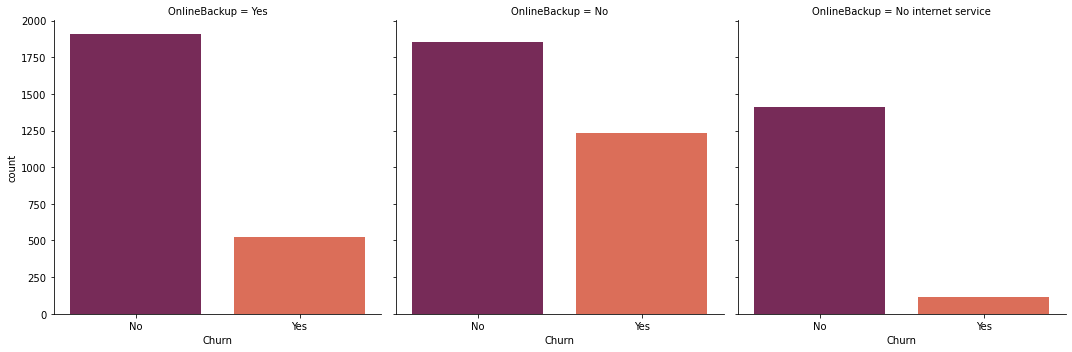

In [461]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='OnlineBackup',data=df,kind='count',palette="rocket")

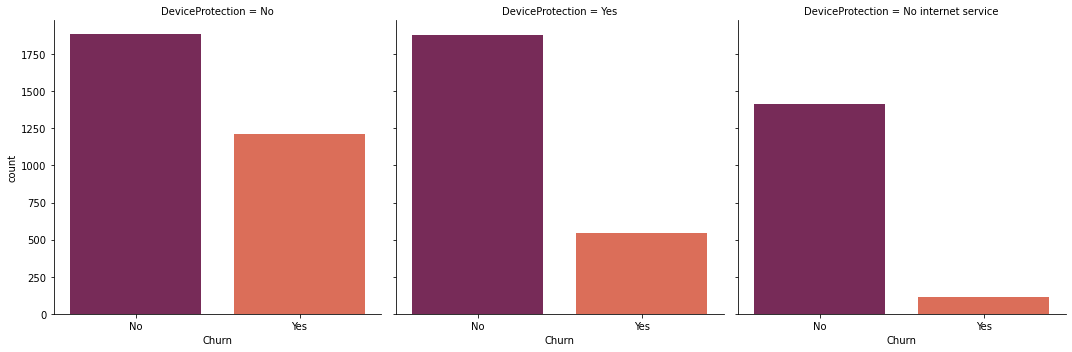

In [462]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='DeviceProtection',data=df,kind='count',palette="rocket")

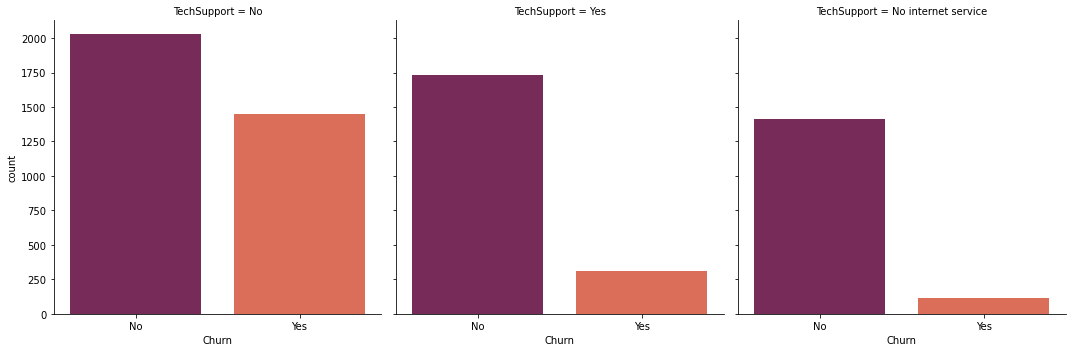

In [463]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='TechSupport',data=df,kind='count',palette="rocket")

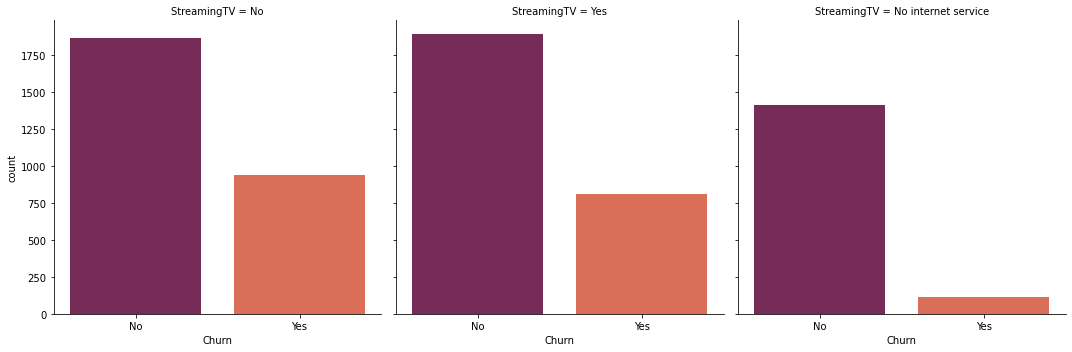

In [464]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='StreamingTV',data=df,kind='count',palette="rocket")

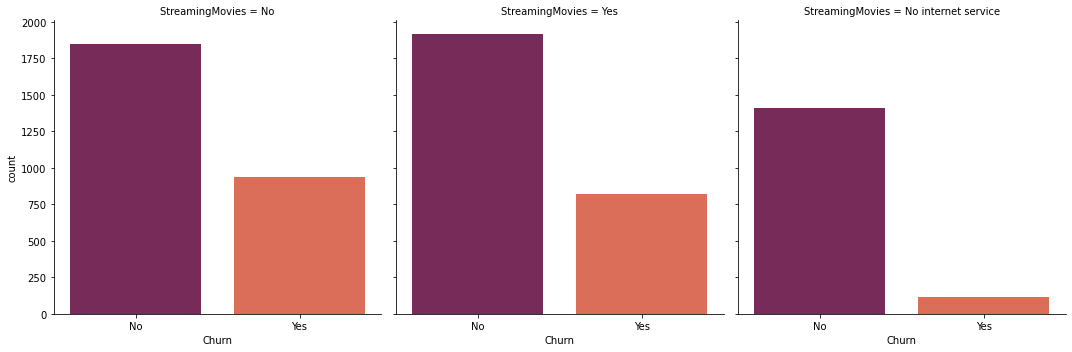

In [466]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='StreamingMovies',data=df,kind='count',palette="rocket")

Customers Without StreamingMovies  and with are almost equally not churned and the least number is in No internetservices
.And Customers Without StreamingMovies are more churned.And very least in internetservices comparing.

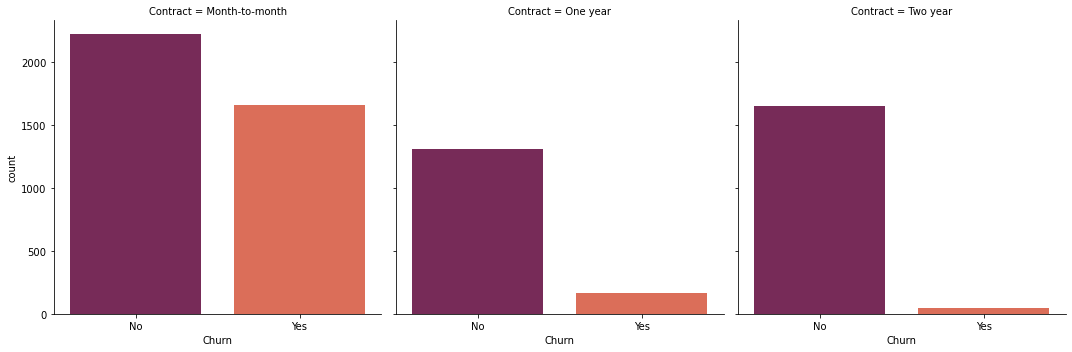

In [467]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='Contract',data=df,kind='count',palette="rocket")

Customers With Month-to-month contract are more in number.And Customers With Month-to-month contract are more churned than other contracts.
the least number of people churned are in two year and slioghlty higher in one year

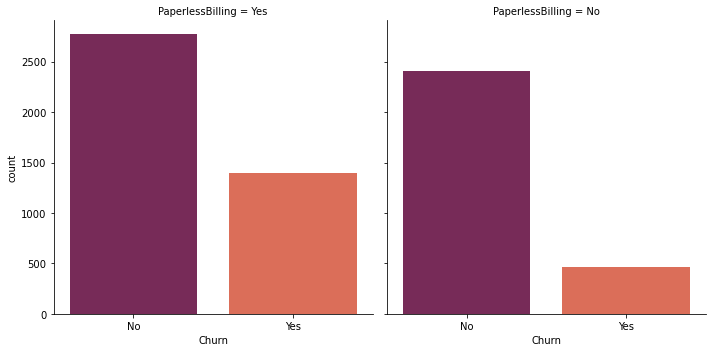

In [468]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='PaperlessBilling',data=df,kind='count',palette="rocket")

Customers With Paperlessbill are more in number and the .And Customers With paperlessbill are more churned compared to paperbills in the dataset.

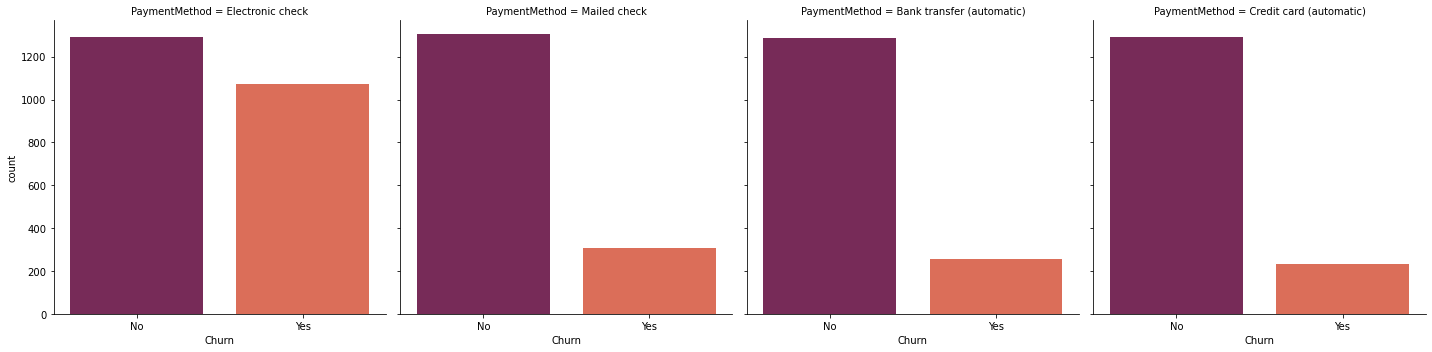

In [469]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='PaymentMethod',data=df,kind='count',palette="rocket")

Customers With Electronic check payment method are more in number.And Customers With Electronic check payment method are more churned.
We can see credit card has least Churn comparing the rest of the payment methods

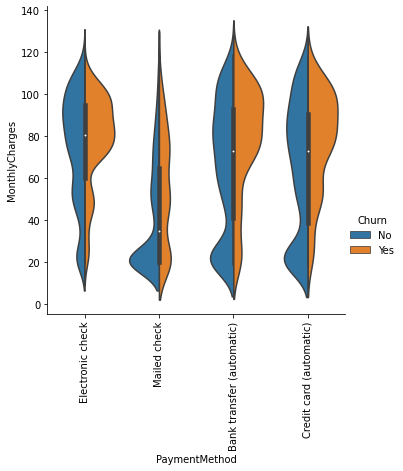

In [470]:
# Let's plot catplot for pair of features
sns.catplot(x = "PaymentMethod", y = "MonthlyCharges", hue = "Churn", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

The churned rate is high for Credit card users and bank transfers.

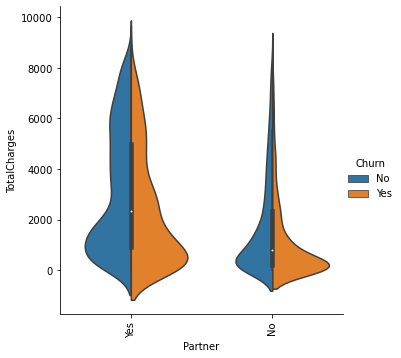

In [471]:
# Let's plot catplot for pair of features
sns.catplot(x = "Partner", y = "TotalCharges", hue = "Churn", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

The churned rate and total charges is high for customers with partners.

In [472]:
columns=df.columns

In [473]:
#relationship for each feature name with the output

def scat_plt(a):
    plt.figure()
    sns.scatterplot(x=df[columns[a]],y=df['Churn'],color='red')

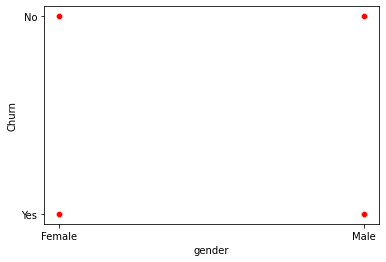

In [474]:
scat_plt(0)

since gender is categorical variables data it is unevenly distributed in the dataset.

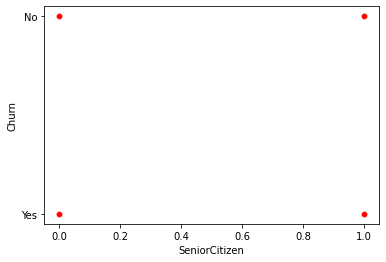

In [475]:
scat_plt(1)

since Seniorcitizen is categorical variables data it is unevenly distributed in the dataset.

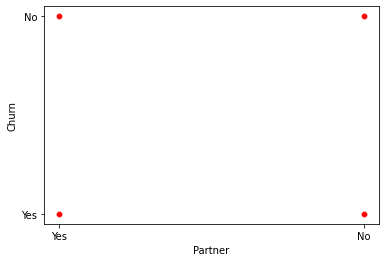

In [476]:
scat_plt(2)

since Partner is categorical variables data it is unevenly distributed in the dataset.

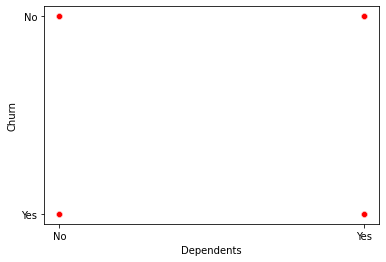

In [477]:
scat_plt(3)

since Dependents  is categorical variables data it is unevenly distributed in the dataset.

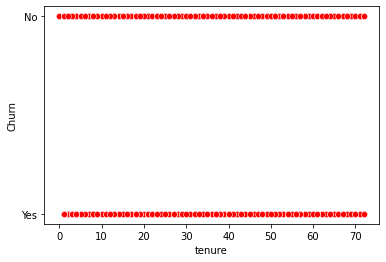

In [478]:
scat_plt(4)

we are able to see the value of tenure is normally distributed in the range 0 to 70 ,in thedataset

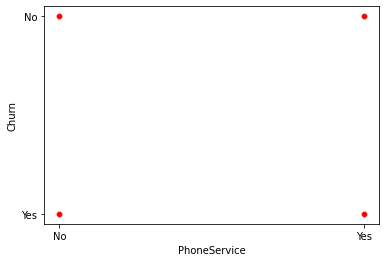

In [479]:
scat_plt(5)

since PhoneService is categorical variables data it is unevenly distributed in the dataset.

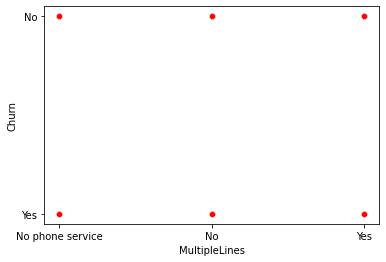

In [480]:
scat_plt(6)

since MultipleLines is categorical variables data it is unevenly distributed in the dataset.

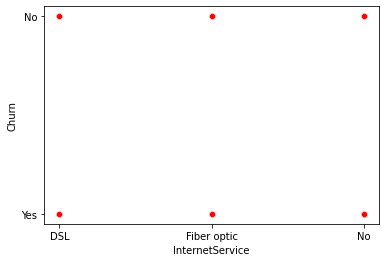

In [481]:
scat_plt(7)

since InternetService is categorical variables data it is unevenly distributed in the dataset.

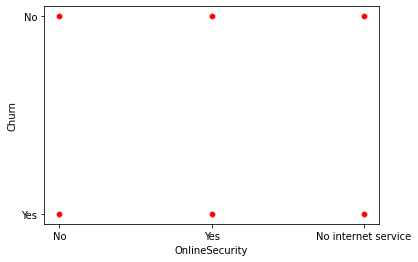

In [482]:
scat_plt(8)

since OnlineSecurity is categorical variables data it is unevenly distributed in the dataset.

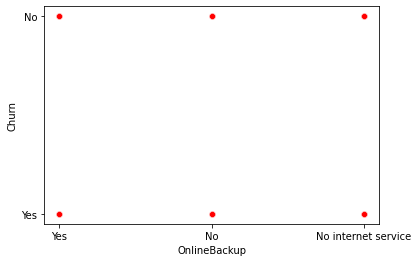

In [483]:
scat_plt(9)

since OnlineBackup is categorical variables data it is unevenly distributed in the dataset.

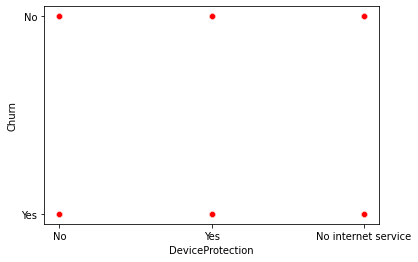

In [484]:
scat_plt(10)

since DeviceProtection is categorical variables data it is unevenly distributed in the dataset.

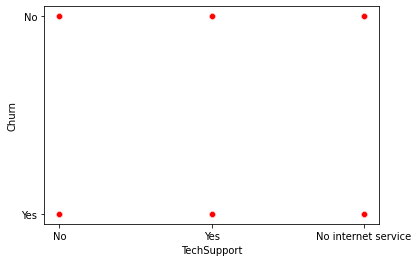

In [485]:
scat_plt(11)

since TechSupport is categorical variables data it is unevenly distributed in the dataset.

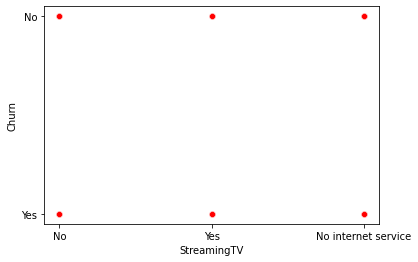

In [486]:
scat_plt(12)

since StreamingTV is categorical variables data it is unevenly distributed in the dataset.

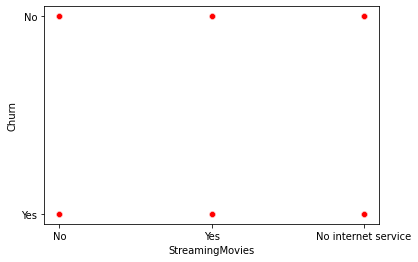

In [487]:
scat_plt(13)

since StreamingMovies is categorical variables data it is unevenly distributed in the dataset.

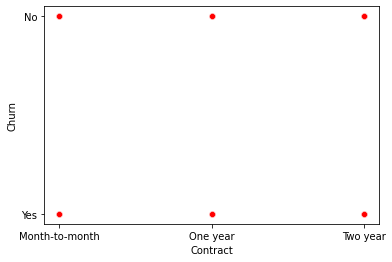

In [488]:
scat_plt(14)

since Contract is categorical variables data it is unevenly distributed in the dataset.

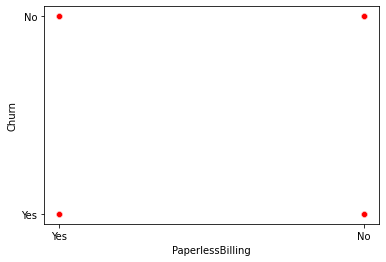

In [489]:
scat_plt(15)

since PaperlessBilling  is categorical variables data it is unevenly distributed in the dataset.

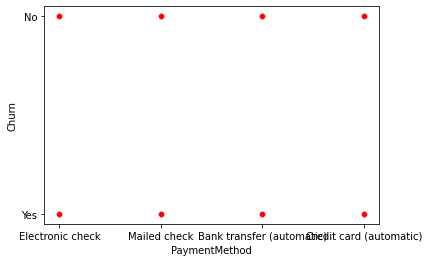

In [490]:
scat_plt(16)

since PaymentMethod is categorical variables data it is unevenly distributed in the dataset.

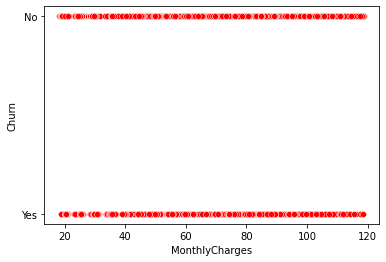

In [491]:
scat_plt(17)

we are able to see the value of MonthlyCharges is normally distributed in the range 20 to 120 ,in thedataset

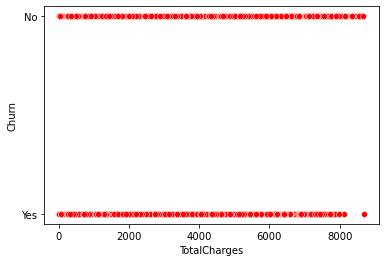

In [492]:
scat_plt(18)

we are able to see the value of TotalCharges is normally distributed in the range 0 to 8000 ,in thedataset 

# Multivariate Analysis

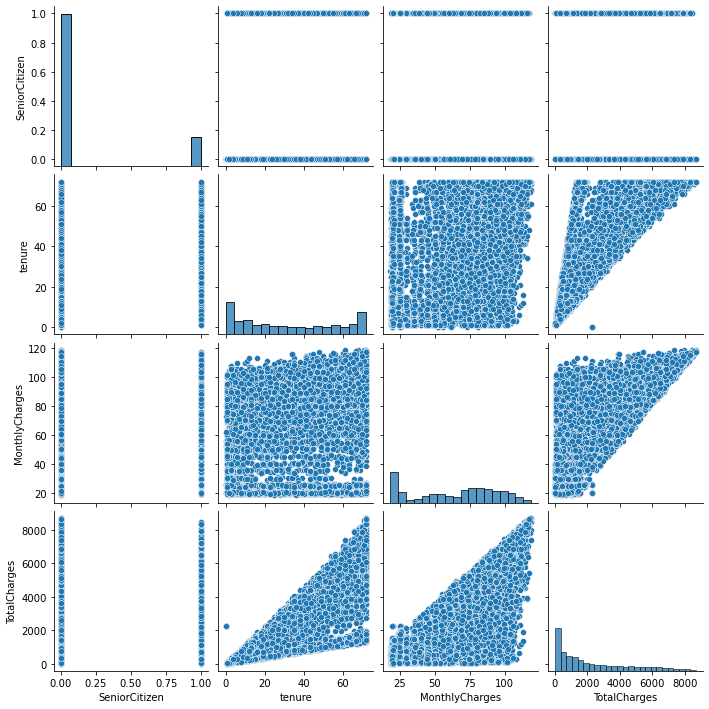

In [493]:
#pair ploting for df
sns.pairplot(df)

Above is the pair plot for having Churn as target.There are some outliers present in the dataset.

# outliers Detection

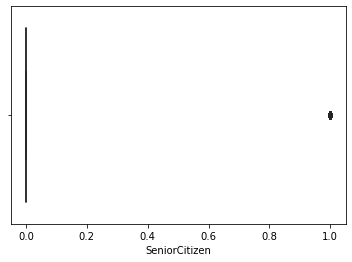

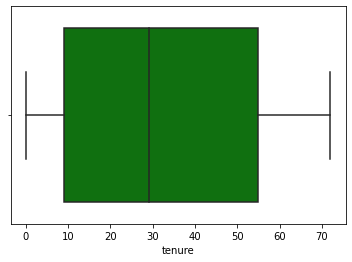

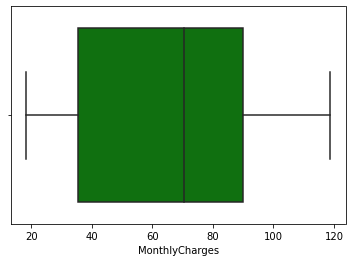

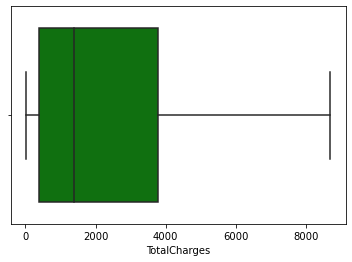

In [494]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[numer[a]],color='green')
    
for i in range(0,4):
    bxplt(i)

We can ignore the outliers in the senior citizen column since it is categorical data with zero and ones.

Lets move on with the dataset 

# Encoding

In [502]:
# Separating categorical columns in df
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [503]:
#Encoding the columns using LabelEncoder

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)

In [504]:
#Updated dataset after encoding
df.head(100)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


# Skewness Removal

In [521]:
#initialising X and y
X=df.drop(['Churn'],axis=1)
y=df.Churn

We can ignore the skewness in the categorical columns so lets check in the numerical columns 

In [522]:
X[numer].skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

we have to remove the skewness from TotalCharges ,the skewness in the SeniorCitizen is acceptable since its a categorical data

In [523]:

from sklearn.preprocessing import PowerTransformer
X['TotalCharges']=PowerTransformer(method='yeo-johnson').fit_transform(X[['TotalCharges']])

In [524]:
X['TotalCharges'].skew()

-0.14489927430068528

we have removed the skewness in the dataset 

# Scaling the data

In [525]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

# checking multicollinearity

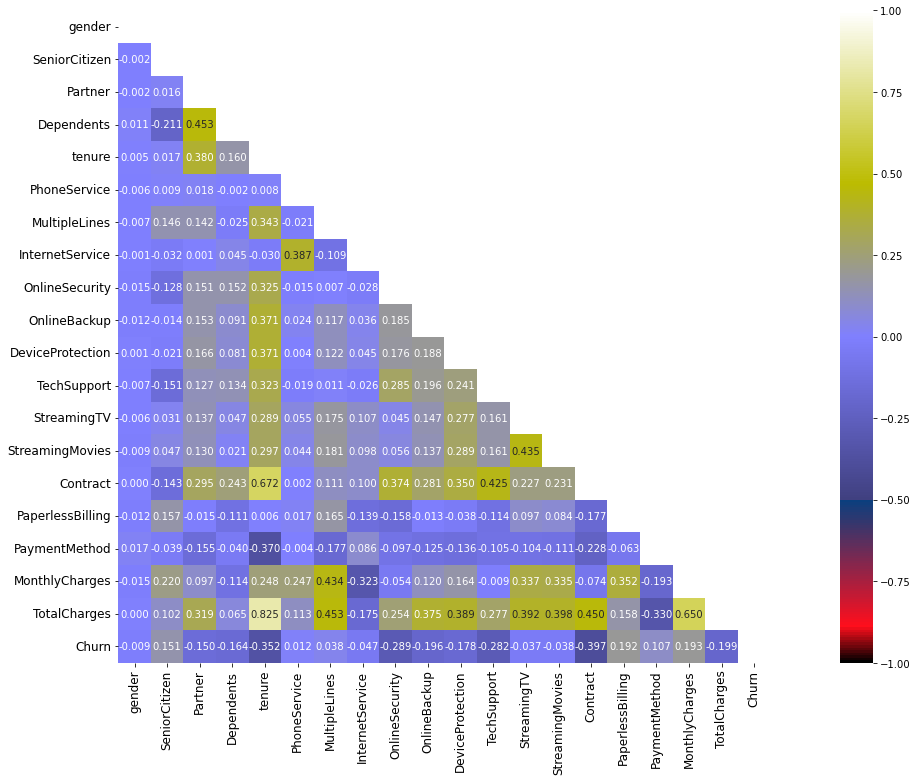

In [528]:
df_cor=df.corr()
upper_triangle = np.triu(df_cor)
plt.figure(figsize=(25,12))
sns.heatmap(df_cor, vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [529]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,1.001684,gender
1,1.149730,SeniorCitizen
2,1.463075,Partner
3,1.384396,Dependents
4,10.690306,tenure
5,1.622399,PhoneService
6,1.397403,MultipleLines
7,1.866643,InternetService
8,1.252550,OnlineSecurity
9,1.188767,OnlineBackup


the vif is more than 10.lets drop the the column iteratively for removing multicollinearity.

In [531]:
X.drop('TotalCharges',axis=1,inplace=True)

In [533]:
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


the multicollinearity is removed completely.the vif is less than 10.There is no multicollinearity found.

# Model Building

In [534]:
#X,y already initialized
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365


In [555]:
#finding best random_state

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    Lg=LogisticRegression()
    Lg.fit(x_train,y_train)
    predlg=Lg.predict(x_test)
    acc=accuracy_score(y_test,predlg)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.8239469947941316  on random_state  178


In [556]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=178)

In [557]:
# different algorithm going to use

lg=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
gd=GradientBoostingClassifier()
xgb=XGBClassifier()

In [558]:
#code for Training and Prediction 

def evaluate(x):
    model=x
    print(model)
    #training the model
    model.fit(x_train,y_train)
    pred_train=model.predict(x_train)
    #model prediction
    pred=model.predict(x_test)
    
    print("train accuracy score is {:.2f}%".format(accuracy_score(y_train,pred_train)*100))
    print("test accuracy score is {:.2f}%".format(accuracy_score(y_test,pred)*100))
    
    print("\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
    print("\n")
    print("Classification Report  : \n",classification_report(y_test,pred))

In [559]:
#calling LogisticRegressionClassifier
evaluate(lg)

LogisticRegression()
train accuracy score is 79.82%
test accuracy score is 82.39%


Confusion Matrix : 
 [[1424  131]
 [ 241  317]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.86      0.92      0.88      1555
           1       0.71      0.57      0.63       558

    accuracy                           0.82      2113
   macro avg       0.78      0.74      0.76      2113
weighted avg       0.82      0.82      0.82      2113



In [560]:
#calling KNeighborsClassifier
evaluate(knn)

KNeighborsClassifier()
train accuracy score is 83.33%
test accuracy score is 76.10%


Confusion Matrix : 
 [[1321  234]
 [ 271  287]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1555
           1       0.55      0.51      0.53       558

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.69      2113
weighted avg       0.76      0.76      0.76      2113



In [561]:
#calling SVC Classifier
evaluate(svc)

SVC()
train accuracy score is 81.93%
test accuracy score is 80.88%


Confusion Matrix : 
 [[1435  120]
 [ 284  274]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.83      0.92      0.88      1555
           1       0.70      0.49      0.58       558

    accuracy                           0.81      2113
   macro avg       0.77      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [562]:
#calling DecisionTreeClassifier
evaluate(dtc)

DecisionTreeClassifier()
train accuracy score is 99.80%
test accuracy score is 71.42%


Confusion Matrix : 
 [[1263  292]
 [ 312  246]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1555
           1       0.46      0.44      0.45       558

    accuracy                           0.71      2113
   macro avg       0.63      0.63      0.63      2113
weighted avg       0.71      0.71      0.71      2113



In [563]:
#calling RandomForestClassifier
evaluate(rf)

RandomForestClassifier()
train accuracy score is 99.80%
test accuracy score is 78.47%


Confusion Matrix : 
 [[1399  156]
 [ 299  259]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1555
           1       0.62      0.46      0.53       558

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [564]:
#calling AdaBoostClassifier
evaluate(ada)

AdaBoostClassifier()
train accuracy score is 80.08%
test accuracy score is 80.69%


Confusion Matrix : 
 [[1400  155]
 [ 253  305]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1555
           1       0.66      0.55      0.60       558

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [565]:
#calling GradientBoostingClassifier
evaluate(gd)

GradientBoostingClassifier()
train accuracy score is 82.15%
test accuracy score is 81.73%


Confusion Matrix : 
 [[1421  134]
 [ 252  306]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1555
           1       0.70      0.55      0.61       558

    accuracy                           0.82      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.81      0.82      0.81      2113



In [566]:
#calling XGBClassifier
evaluate(xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
train accuracy score is 93.63%
test accuracy score is 78.94%


Confusion Matrix : 
 [[1363  192]
 [ 253  305]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1555
          

In [570]:
model=[lg,knn,svc,dtc,rf,ada,gd,xgb]

for m in model:
    score=cross_val_score(m,X,y,cv=5)
    print(m,"Cross val score is ",score*100,"   ")
    print("mean is ",score.mean()*100,"\n\n")

LogisticRegression() Cross val score is  [80.5535841  81.54719659 78.70830376 80.53977273 80.61079545]    
mean is  80.39193052777598 


KNeighborsClassifier() Cross val score is  [76.57913414 76.29524485 74.16607523 74.85795455 75.71022727]    
mean is  75.52172720820698 


SVC() Cross val score is  [79.91483322 80.41163946 78.42441448 79.97159091 80.11363636]    
mean is  79.76722288534745 


DecisionTreeClassifier() Cross val score is  [73.81121363 72.74662881 71.04329312 69.88636364 72.30113636]    
mean is  71.95772711142654 


RandomForestClassifier() Cross val score is  [79.34705465 78.92122072 77.35982967 78.26704545 78.90625   ]    
mean is  78.56028009871605 


AdaBoostClassifier() Cross val score is  [81.12136267 80.48261178 79.91483322 80.53977273 80.75284091]    
mean is  80.56228426027486 


GradientBoostingClassifier() Cross val score is  [81.40525195 80.12775018 78.4953868  80.39772727 80.75284091]    
mean is  80.23579142202722 


XGBClassifier(base_score=0.5, booster=

# By comparing both cross validation accuracy and actual accuracy. It is found that Ada Boost Classifier is the best model with a difference of 0.12%

In [571]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [572]:
#parameters for AdaBoostClassifier 
grid_params = { 
                'n_estimators':[50, 100,150,200,250,300],     
             'algorithm':['SAMME','SAMME.R'],
             'learning_rate':[0.01,0.05,0.1,0.3,1],
                'random_state':[int,None]}

In [574]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_search= GridSearchCV(estimator=ada,param_grid=grid_params,cv= 5,n_jobs=-1)

In [575]:
#training the models with  parameters
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [50, 100, 150, 200, 250, 300],
                         'random_state': [<class 'int'>, None]})

In [576]:
grid_search.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.1,
 'n_estimators': 250,
 'random_state': None}

In [577]:
#updating the model with  parameters
hada=AdaBoostClassifier(n_estimators=250 ,algorithm='SAMME.R', learning_rate= 0.1,random_state=None)


In [578]:
#calling hypertuned AdaBoostClassifier
evaluate(hada)

AdaBoostClassifier(learning_rate=0.1, n_estimators=250)
train accuracy score is 80.51%
test accuracy score is 81.12%


Confusion Matrix : 
 [[1411  144]
 [ 255  303]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1555
           1       0.68      0.54      0.60       558

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [580]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve

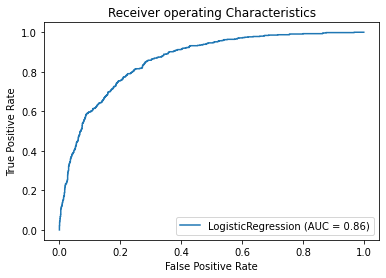

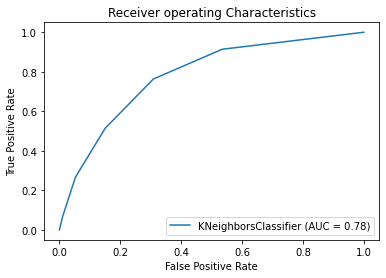

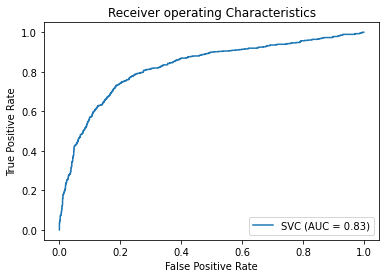

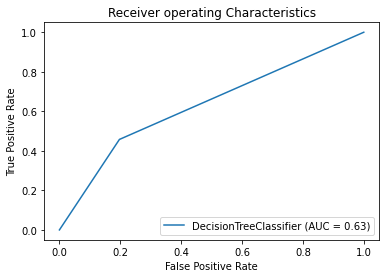

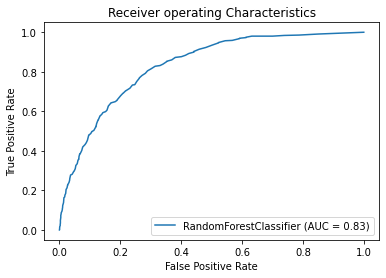

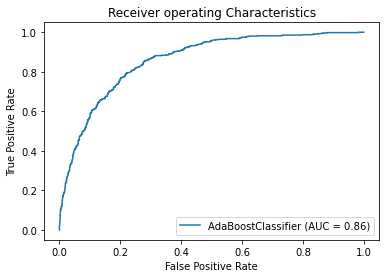

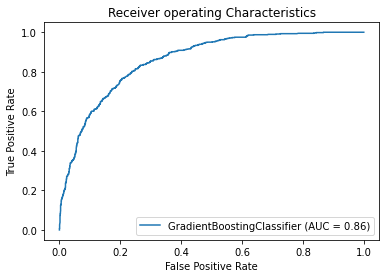

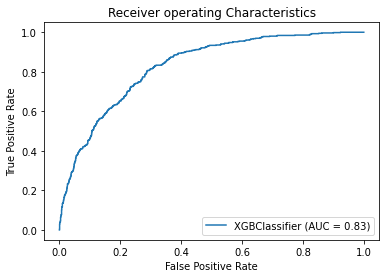

In [581]:
#lets see how well our model works on train data

model=[lg,knn,sv,dtc,rf,hada,gd,xgb]
for m in model:
    ax=m.fit(x_train,y_train)
    plot_roc_curve(ax,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plt.show()

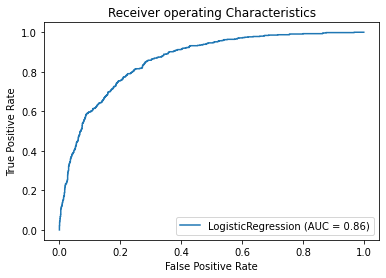

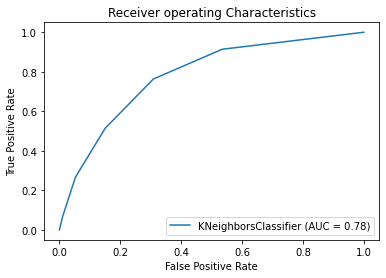

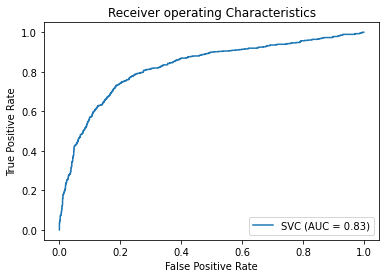

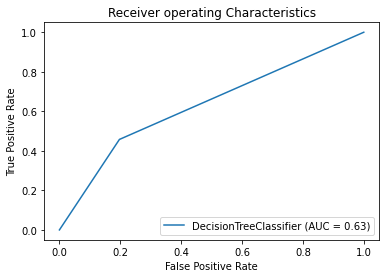

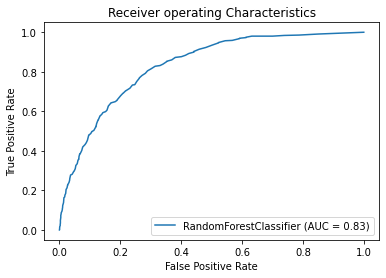

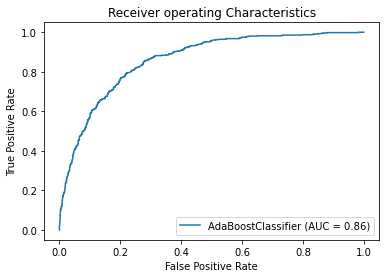

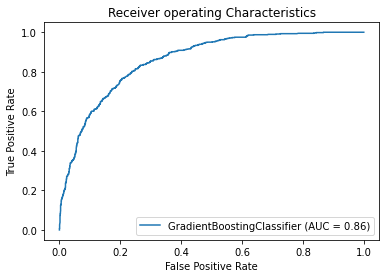

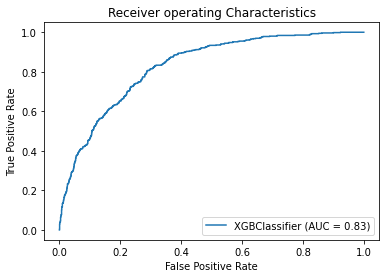

In [582]:
#lets see how well our model works on test data

model=[lg,knn,sv,dtc,rf,hada,gd,xgb]
for m in model:
    plot_roc_curve(m,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

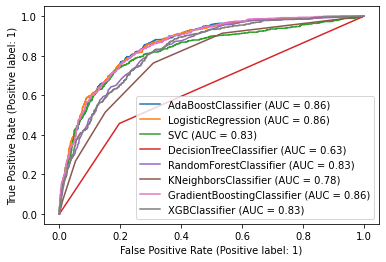

In [583]:

disp = plot_roc_curve(hada,x_test,y_test)
plot_roc_curve(lg, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gd, x_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')
plt.show()

we can see that the Area under curve is 86% for AdaboostClassifier hypertuned model

The hyper parameter tuning of support vector classifier gives actual accuracy of 81.12 % and cross val of 80.562 %. Since there is accuracy increase of ~1% for hypertuned parameter. The hypertuned model of AdaBoostClassfier algorithm is selected for final output.

# AdaBoostClassifier hypertuned model with true accuracy 81.12% is selected as final model for execution

In [585]:
joblib.dump(hada,"CustomerChurn_prediction.obj")

['CustomerChurn_prediction.obj']

In [586]:
#Lets Check loading the file 

Churn_prediction=joblib.load("CustomerChurn_prediction.obj")

In [587]:
Churn_prediction.score(x_test,y_test)

0.8111689540937056

In [588]:
pred=hada.predict(x_test)
Conclusion=pd.DataFrame([Churn_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [589]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

we can see it is giving exact data as result. The model is working well

After Training and Testing Eight algorithm model. The best accuracy model was determined as AdaBoostClassifier (hypertuned model) with 81.12% true accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase